In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DECISION TREE [POST-PRUNING TECHNIQUE]

In [2]:
import warnings
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.filterwarnings("ignore")

In [4]:
iris = sns.load_dataset("iris")

In [5]:
iris["species"].replace({"setosa":0,"virginica":1,"versicolor":2},inplace = True)

In [6]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,1
116,6.5,3.0,5.5,1.8,1
70,5.9,3.2,4.8,1.8,2
35,5.0,3.2,1.2,0.2,0
73,6.1,2.8,4.7,1.2,2


In [7]:
x = iris.iloc[:,:4].values
y = iris.iloc[:,-1].values

In [8]:
print(x.shape, y.shape)

(150, 4) (150,)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)

In [11]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.664\nsamples = 120\nvalue = [36, 45, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.497\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 42, 1]')]

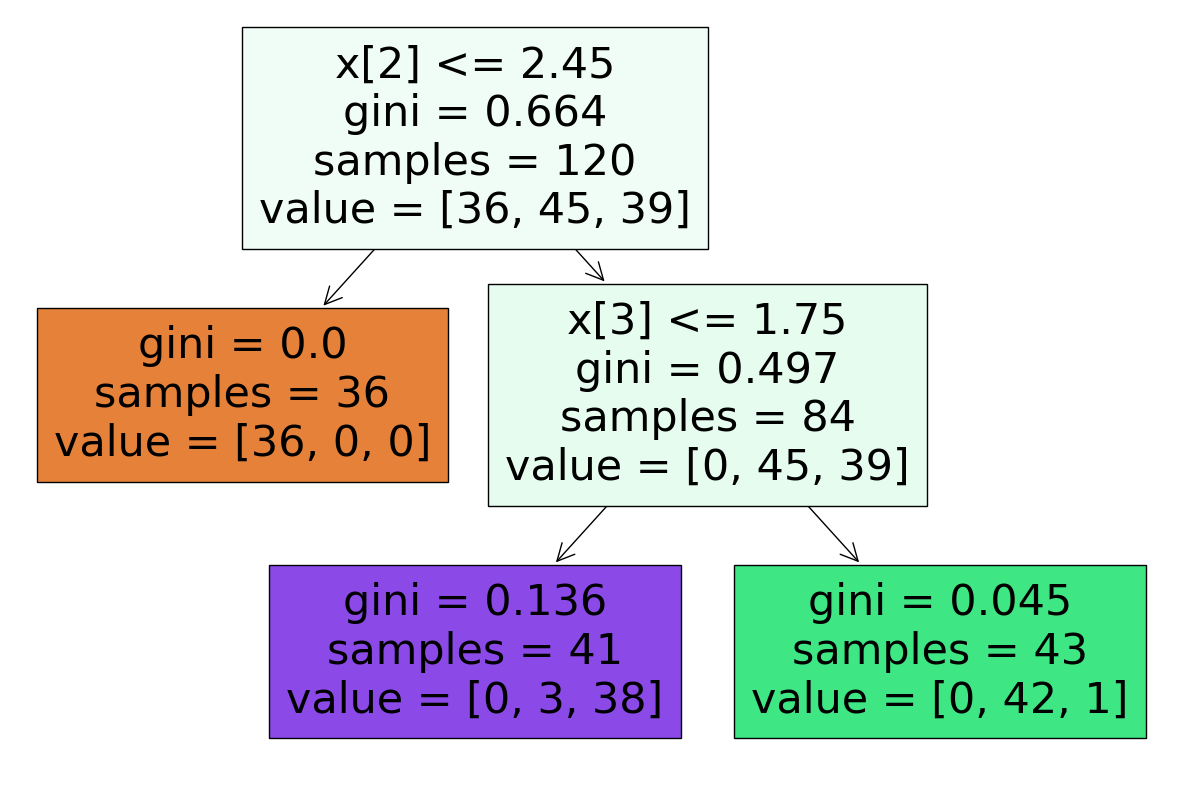

In [12]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled = True)

In [13]:
y_pred = clf.predict(x_test)

In [14]:
y_pred

array([0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 0, 2, 0])

In [15]:
from sklearn.metrics import accuracy_score, classification_report

In [16]:
score = accuracy_score(y_pred,y_test)
score

0.9333333333333333

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.60      1.00      0.75         3
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.87      0.95      0.89        30
weighted avg       0.96      0.93      0.94        30

